In [1]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

import os
from Utils.embedding import plot_results


load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", chunk_size=1)
test_text_embeddings = [
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht LIN?",
    "Für was steht BGM?",
    "Was ist Bezeichnung für Trennzeichen?",
    "Was ist Bezeichnung für Gesetzlich vorgeschriebener Text?",
    "Was ist Bezeichnung für Nachrichtendatum?",
]
pdf_directory = "pdfs"
if os.path.exists("feiss_index/index.faiss") and os.path.exists(
    "feiss_index/index.pkl"
):
    print(f"Loading existing FAISS index from")
    faiss_index = FAISS.load_local("feiss_index", embeddings= embeddings,allow_dangerous_deserialization=True)
else:
    print(f"Creating new FAISS index and saving to")
    pdf_files = [
        os.path.join(pdf_directory, file)
        for file in os.listdir(pdf_directory)
        if file.endswith(".pdf")
    ]

    pages = []
    loader = PyPDFDirectoryLoader(pdf_directory, extract_images=False)
    pages = loader.load_and_split()

    faiss_index = FAISS.from_documents(pages, embeddings)
    FAISS.save_local(faiss_index, "feiss_index")

Loading existing FAISS index from


Erstelle eine Matrix mit jedem Embedding, aber mit verändertem K-Parameter. So kannst du die Unterschiede besser analysieren.

In [2]:
results_score = np.zeros((10, 20))
results_embedding = []
for i in range(10):
    results_score[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 20)
    )[:, 1]
    results_embedding.append(
        faiss_index.similarity_search(test_text_embeddings[i], 20)
    )

Visualisierung der Scores zu den einzelnen Fragen.

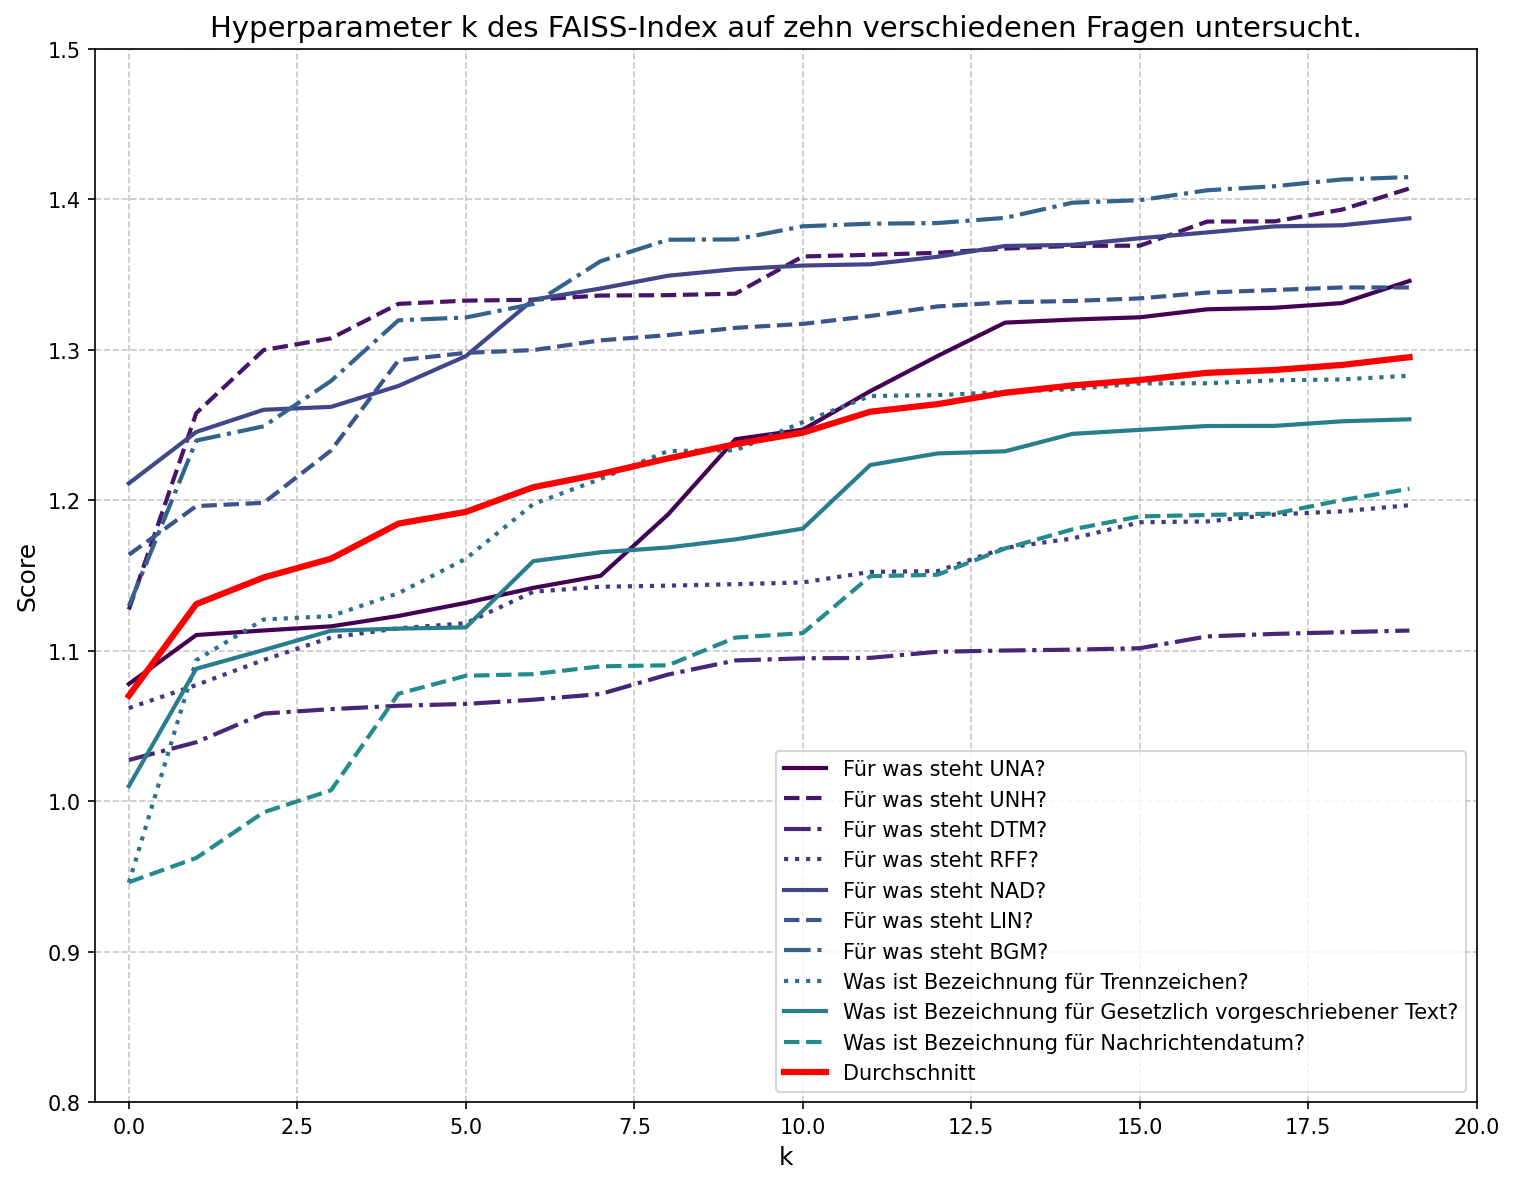

In [3]:
plot_results(
    results_score,
    test_text_embeddings,
    xlim=(-0.5, 20),
    ylim=(0.8, 1.5),
    titel="Hyperparameter k des FAISS-Index auf zehn verschiedenen Fragen untersucht.",
)

Betrachten wir nun die besten Ergebnis für die Frage "Was bedeutet UNA?" 
Nach manueller Kontrolle ab k=6 werden die Ergebnisse schlechter.

In [12]:
for result in results_embedding[0]:
    print("------------------------------------------------")
    print(result.page_content)


------------------------------------------------
EDI Implementation Guidelines  Anwendungshandbuch  
4 Segmentbeschreibung
Bez = Bezeichner, St = Status  Nr Bez St MaxWdh  Ebene  Name  
1 UNA  O 1 0 Trennzeichen -Vorgabe  
Standard  Implementation  
Bez Name  St Format  St Format  Anwendung / Bemerkung  
UNA1  Gruppendatenelem  
ent-Trennzeichen  M an1 an1 Doppelpunkt  
UNA2  Segment - 
Bezeichner - und 
Datenelement - 
Trennzeichen  M an1 an1 Pluszeichen  
UNA3  Dezimalzeichen  M an1 an1 Punkt  
UNA4  Freigabezeichen  M an1 an1 Fragezeichen  
UNA 5 Reserviert für  
spätere  
Verwendung  M an1 an1 Leerzeichen  
UNA6  Segment - 
Endezeichen  M an1 an1 Hochkomma  
Bemerkung:  
Beispiel:  
UNA:+.? '  
29.11.2016  
Seite: 9 20.01.2021 
Seite: 22Porsche VDA 4938 T4 - Global INVOIC
© Dr. Ing. h.c. F. Porsche AG Version PORSCHE: 1.0 Variante: Frachtrechnung/Freight invoice
------------------------------------------------
VDA-Empfehlung  4938  T5 Version 1.0  , September 2015  Seite  25  von 4

Betrachten wir nun die besten Ergebnis für die Frage "Was bedeutet UNH? 
Nach manueller Kontrolle ab k=1 werden die Ergebnisse schlechter.

In [9]:
for result in results_embedding[1]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:14 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0010 3   UNH   M 1 0  Nachrichten-Kopfsegment  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  
UNH       UNH   
0062  Nachrichten-Referenznummer  M an..14   M an..14 +1  Nachrichten-Referenznummer - eindeutige 
Nummer zur Identifikation der Nachricht im 
Datenaustausch, üblicherweise eine fortlaufend 
aufsteigende Nummer beginnend mit 1.  
S009  Nachrichten -Kennung  M   M    
0065  Nachrichtentyp -Kennung  M an..6   M an..6  +INVOIC   INVOIC  Rechnung  
0052  Versionsnummer des  
Nachrichtentyps  M an..3   M an..3 :D   D Entwurfs-Version  
0054  Freigabenummer des  
Nachrichtentyps  M an..3   M 

Betrachten wir nun die besten Ergebnis für die Frage "Was bedeutet DTM?" 
Nach manueller Kontrolle ab k=4 werden die Ergebnisse schlechter.

In [10]:
for result in results_embedding[2]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:17 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0030 6   DTM   D          11  Liefer- / Leistungsdatum  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  
DTM       DTM   
C507  Datum/Uhrzeit/Zeitspanne  M   M    
2005  Datums- oder Uhrzeits- oder  
Zeitspannen-Funktion, Qualifier  M an..3   M an..3 +1   1 Abschluss der Serviceleistung,  
          tatsächlicher  Zeitpunkt  
          (Datum/Uhrzeit)  
2380  Datum oder Uhrzeit oder  
Zeitspanne, Wert  C an..35   R n..8 :20160420  Liefer- / Leistungsdatum  
2379  Datums- oder Uhrzeit- oder  
Zeitspannen-Format, Code  C an..3   R an..3 :102'   102  CCYYMMDD  
 Anmerkungen  Das Lieferdatum auf Kopfe

Betrachten wir nun die besten Ergebnis für die Frage "Was bedeutet RFF?" 
Nach manueller Kontrolle ab k=20 werden die Ergebnisse schlechter.

In [11]:
for result in results_embedding[3]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:25 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0120   SG1   O 1 1  Vorangegangene Rechnungsbelege  
  
 0130 13   RFF   M 1 1  Vorangegangene Rechnungsbelege  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
RFF       RFF   
C506  Referenz  M   M    
1153  Referenz, Qualifier  M an..3   M an..3 +IV  Qualifier IV: zu benutzen bei Belastungsanzeigen 
oder Gutschriften, die sich auf vorangegangene 
Rechnungsdokumente beziehen. 
Art der Referenz, codiert  
 IV  Rechnungsnummer  
1154  Referenz, Identifikation  C an..70   R an..70  :F336N66 ' Vorangegangene  / originaler  Rechnungsbeleg  
1156  Zeilennummer  C an..6   N   Nicht benutzt  
1056  Versi

Betrachten wir nun die besten Ergebnis für die Frage "Für was steht NAD?"
Nach manueller Kontrolle ab k=2 werden die Ergebnisse schlechter.

In [13]:
for result in results_embedding[4]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:52 /96  
 
Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0220   SG2   D 1 1  Steuervertreter des Lieferanten  
  
 0230 34   NAD   M 1 1  Steuervertreter des Lieferanten  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
NAD       NAD   
3035  Beteiligter, Qualifier  M an..3   M an..3 +LC   LC  Steuervertreter des L ieferanten. Partei 
die die Mehrwertssteuer deklariert (VAT)  
C082  Identifikation des Beteiligten  C   O     
3039  Beteiligter, Identifikation  M an..35   M an..35  + Nicht benutzt  
1131  Codeliste, Code  C an..17   N   Nicht benutzt  
3055  Verantwortliche Stelle für die  
Codepflege, Code  C an..3   R an..3  Nicht benutzt  
C058  Name und

Betrachten wir nun die besten Ergebnis für die Frage "Für was steht LIN?"
Nach manueller Kontrolle ab k=4 werden die Ergebnisse schlechter.

In [14]:
for result in results_embedding[5]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:58 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 1090   SG26   R 900 1  Positionsebene  
  
 1100 40   LIN   M 1 1  Position und Artikelnummer  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
LIN       LIN   
1082  Positionsnummer  C an..6   R n..6 +1  Vom Nachrichtensender generierte aufsteigende  
Positionsnummer, die eine Position innerhalb der 
Nachricht  identifiziert.  
Es wird empfohlen, mit 1 zu beginnen und 
fortlaufend für jede neue Position um 1 zu  
erhöhen.  
1229  Handlung, Code  C an..3   N  + Nicht benutzt  
C212  Waren-/Leistungsnummer,  
Identifikation  C   O    
7140  Produkt-/Leistungsnummer  C an..35   R an..35 +6081271  ID 

Betrachten wir nun die besten Ergebnis für die Frage "Für was steht BGM?"
Nach manueller Kontrolle ab k=3 werden die Ergebnisse schlechter.

In [15]:
for result in results_embedding[6]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:15 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0020 4   BGM   M 1 0  Rechnungsart und -nummer  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  
BGM       BGM   
C002  Dokumenten-/  
Nachrichtenname  C   R    
1001  Dokumentenname, Code  C an..3   R an..3 +380   Dokumententyp 
 Liste für mögliche Nachrichtentypen: 
 380  Rechnung  
 381  Gutschrift 
 
1131  Codeliste, Code  C an..17   N  : Nicht benutzt  
3055  Verantwortliche Stelle für die  
Codepflege, Code  C an..3   O an..3 :272   272  Joint Automotive Industry Agentur  
Verantwortliche Stelle für Codepflege  
1000  Dokumentenname  C an..35   O an..35 :INC  Rechnungsprozess, Codeliste: 
 I

Betrachten wir nun die besten Ergebnis für die Frage "Was ist Bezeichnung für Trennzeichen?"
Nach manueller Kontrolle ab k=6 werden die Ergebnisse schlechter.

In [16]:
for result in results_embedding[7]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Segmente  
 
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
  Seite:12 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0000 1   UNA   O 1 0  Trennzeichen-Vorgabe  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
UNA       UNA  
UNA1  Gruppendatenelement-  
Trennzeichen  M an1   M an1 : Doppelpunkt  
UNA2  Segment-Bezeichner- und  
Datenelement -Trennzeichen  M an1   M an1 + Pluszeichen  
UNA3  Dezimalzeichen  M an1   M an1  . Punkt  
UNA4  Freigabezeichen  M an1   M an1  ? Fragezeichen  
UNA5  Reserviert für spätere  
Verwendung  M an1   M an1  Leerzeichen  
UNA6  Segment -Endezeichen  M an1   M an1  ' Hochkomma  
 Beispiel  UNA:+.? '
------------------------------------------------
VDA-Empfehlung  49

Betrachten wir nun die besten Ergebnis für die Frage "Was ist Gesetzlich vorgeschriebener Text?"
Nach manueller Kontrolle ab k=10 werden die Ergebnisse schlechter.

In [17]:
for result in results_embedding[8]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
VDA-Empfehlung  4938  Version 1.1  , April 2012  Seite  39  von 157  
 
Segmente  
 
Bez = Objekt -Bezeichner  St = Status  
Nr = Laufende Segmentnummer im Guide  EDIFACT: M=Muss/Mandatory, C=Conditional  
MaxWdh = Maximale Wiederholung der Segmente/Gruppen  Anwendung: R=Erforderlich/Required, O=Optional,  
Zähler = Nummer der Segmente/Gruppen im EDIFACT - D=Abhängig von/Dependent, A=Empfohlen/Advised, N=Nicht  
Standard  benutzt/Not used  
Copyright: VDA  Generated by GEFEG.FX  
  Zähler  Nr Bez St MaxWdh  Ebene  Name  
 0070  9  FTX  O 99 1 Gesetzlich vorgeschriebener Text  
 
 Standard  Implementation  
Bez  Name  St  Format   St Format  Anwendung / Bemerkung  
FTX        
4451  Textbezug, Qualifier  M an..3   M an..3  TXD soll genutzt werden, um den Grund der Steuerbefreung  
anzugeben, sofern zutreffend für alle steuerbefreiten  
Positionen.  
REG wird genutzt für gesetzlich vorgeschriebene  
Textinformationen (z.B. Mitglieder des A

Betrachten wir nun die besten Ergebnis für die Frage "Was ist Bezeichnung für Nachrichtendatum??"
Nach manueller Kontrolle ab k=5 werden die Ergebnisse schlechter.

In [19]:
for result in results_embedding[9]:
    print("------------------------------------------------")
    print(result.page_content)

------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:16 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0030 5   DTM   R 1 1  Nachrichtendatum  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  
DTM       DTM   
C507  Datum/Uhrzeit/Zeitspanne  M   M    
2005  Datums- oder Uhrzeits- oder  
Zeitspannen-Funktion, Qualifier  M an..3   M an..3 +137  Das Nachrichtendatum ist als Synonym zum  
 Rechnungsdatum anzusehen. 
     137 Dokumenten-/Nachrichtendatum/ 
          - zeit  
2380  Datum oder Uhrzeit oder  
Zeitspanne, Wert  C an..35   R n..8 :20160420  Belegdatum  
2379  Datums- oder Uhrzeit- oder  
Zeitspannen -Format, Code  C an..3   R an..3 :102'   102  CCYYMMDD  
 Beispiel  DTM+137:20160420:102'
----